In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
dir='Signal/' #<--- Folder of singal-array
sig=np.load(dir+"stop_01_p_p_to_t1_t1~0_26.7494500003_39HT1001l2j.npy",allow_pickle=True) #<-- Insert filename of signal array


dir='Background/' #<--- folder of bg-array
bg=np.load(dir+"smHT1001l2j.npy",allow_pickle=True)#<--- Insert filename of bg array

In [2]:
print("Signal")
print("Catagory: (events, variables)")
print("1 lep:",np.shape(sig))

Signal
Catagory: (events, variables)
1 lep: (90557, 12)


In [3]:
print("Background")
print("Catagory: (events, variables)")
print("1 lep:",np.shape(bg))

Background
Catagory: (events, variables)
1 lep: (3188321, 12)


In [4]:
sigT=["HT","ETm","ETmphi","pt1","eta1","phi1","pt2","eta2","phi2","ptl","etal","phil"] #<-- Insert relevant parameters
sigU=["HT[MeV]","ETm[MeV]","ETmphi","pt1[MeV]","eta1","phi1","pt2[MeV]","eta2","phi2","ptl[MeV]","etal","phil"] #<--- Insert relevant parameters with units

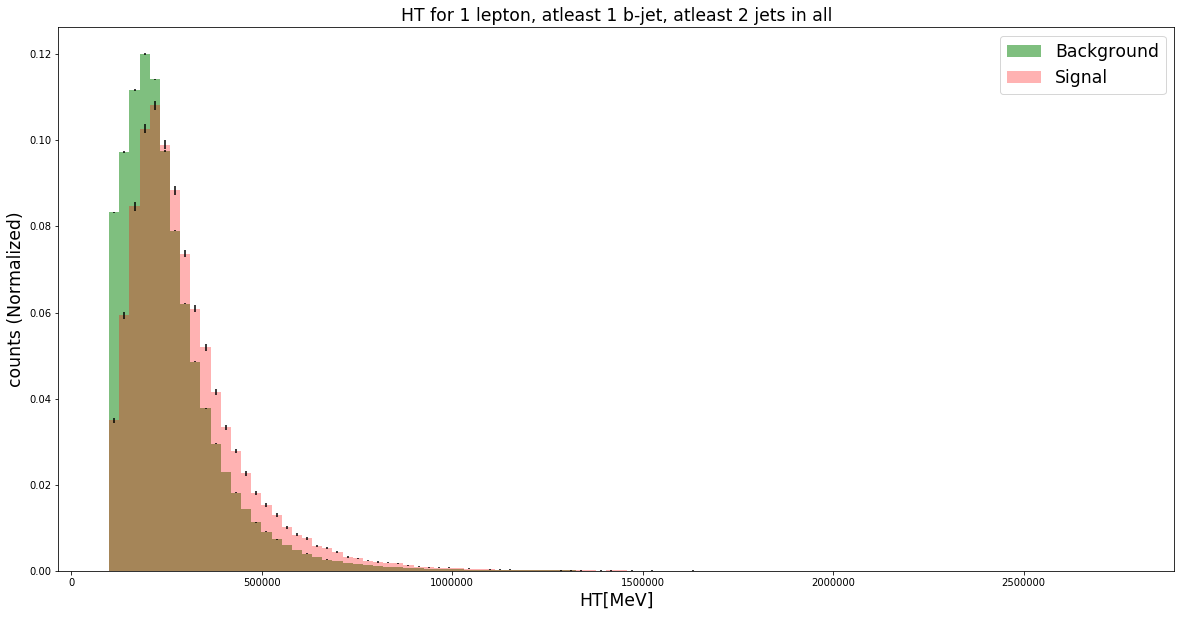

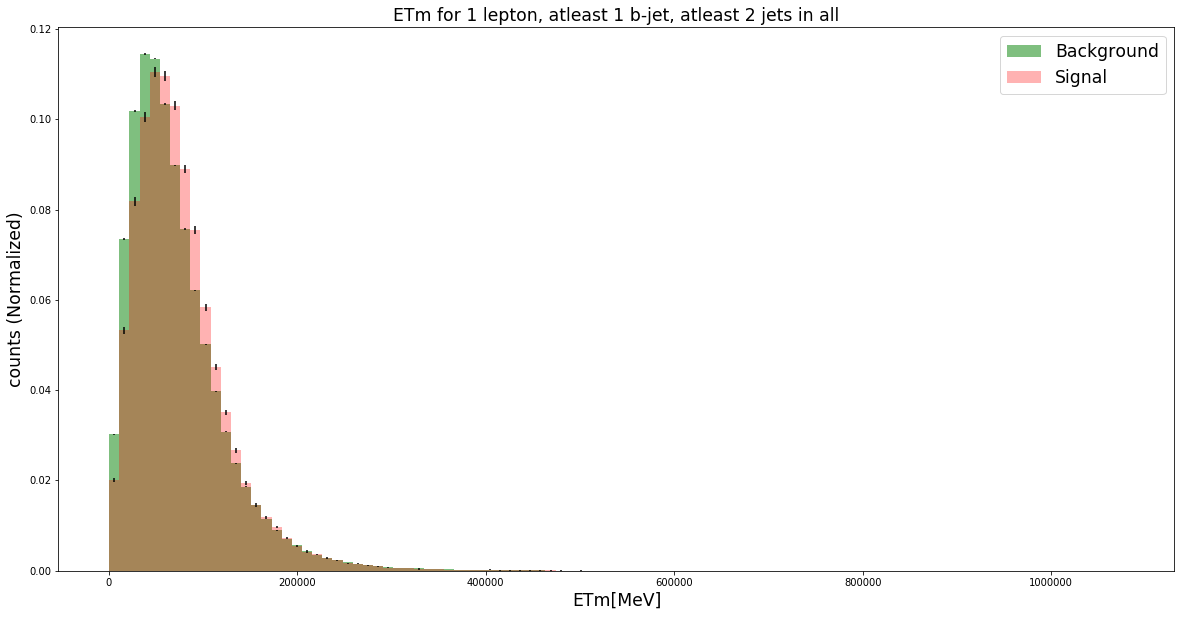

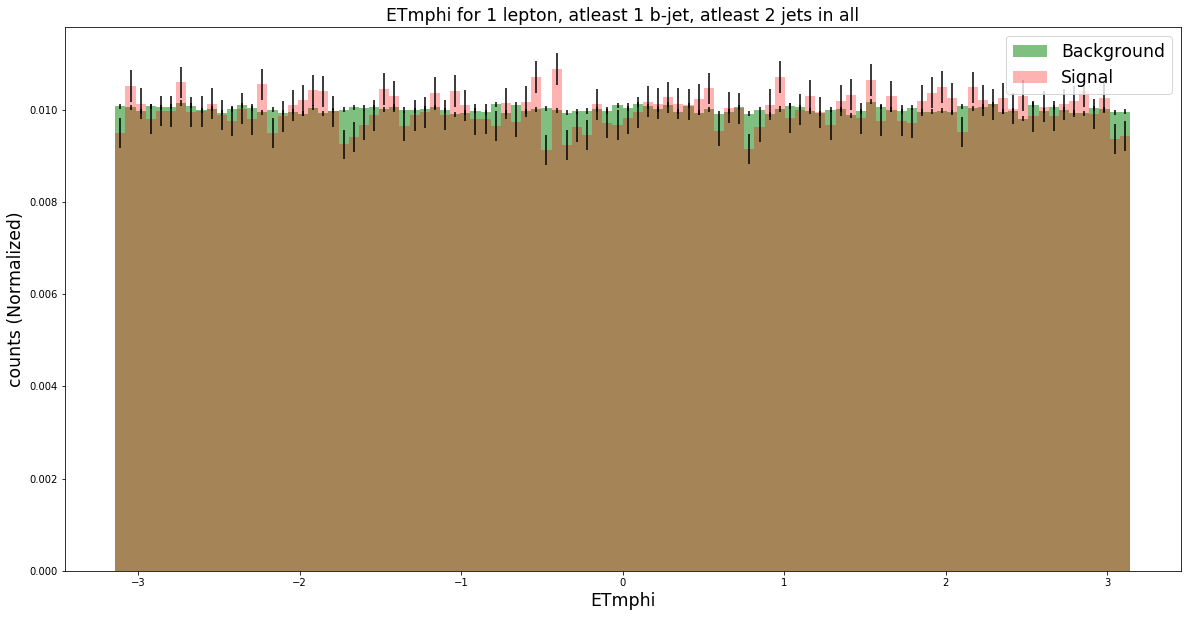

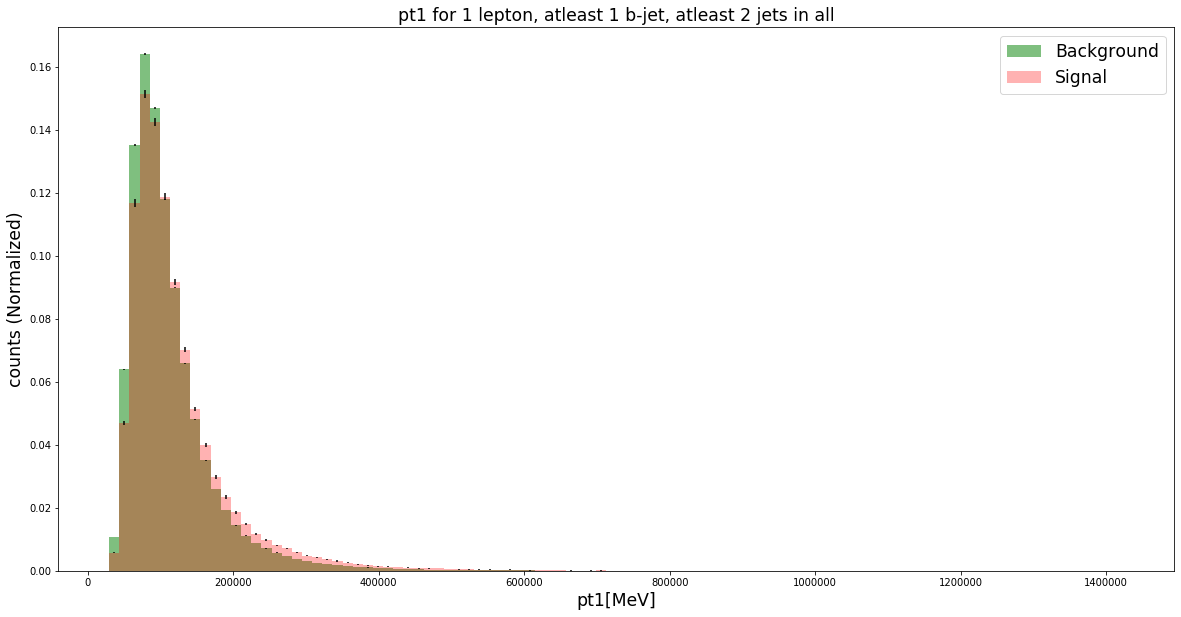

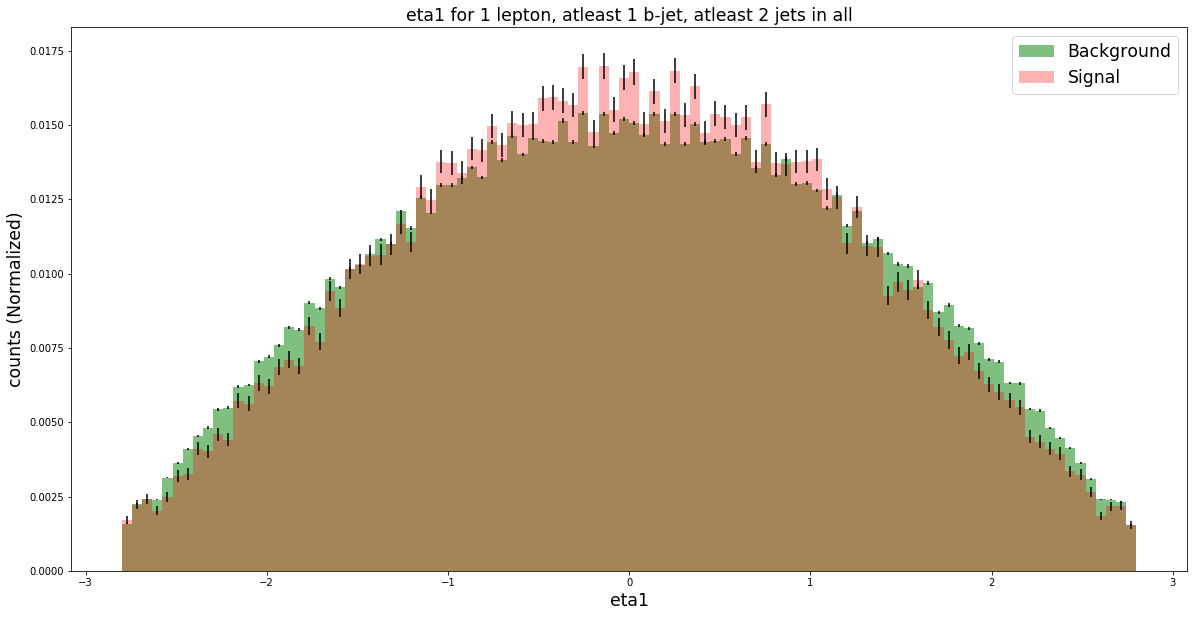

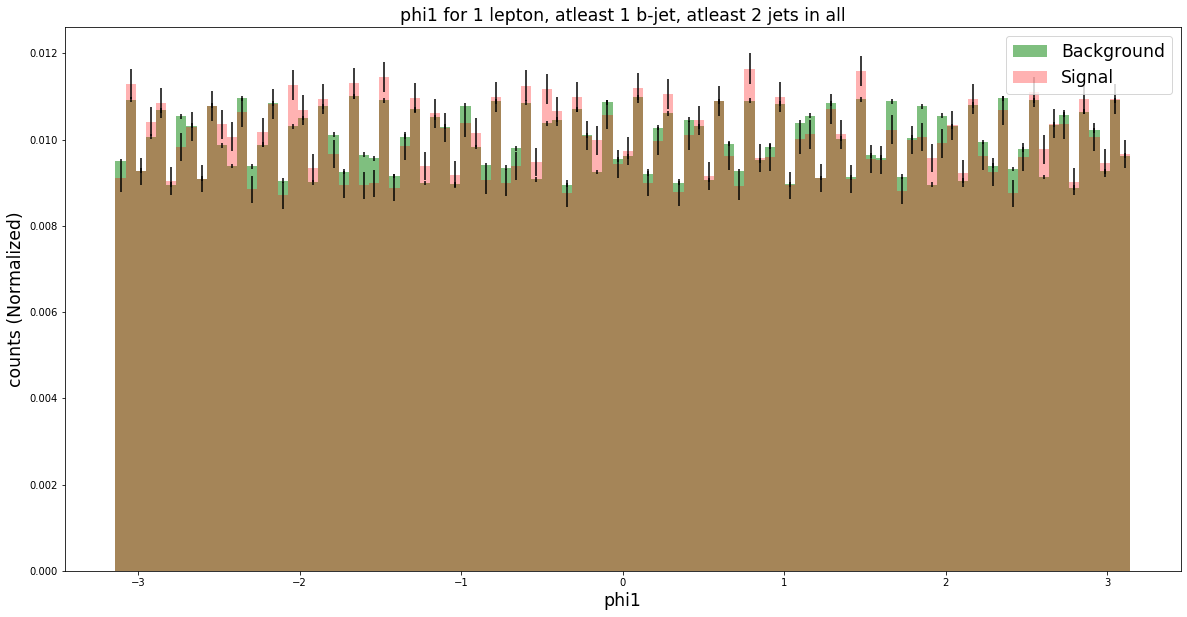

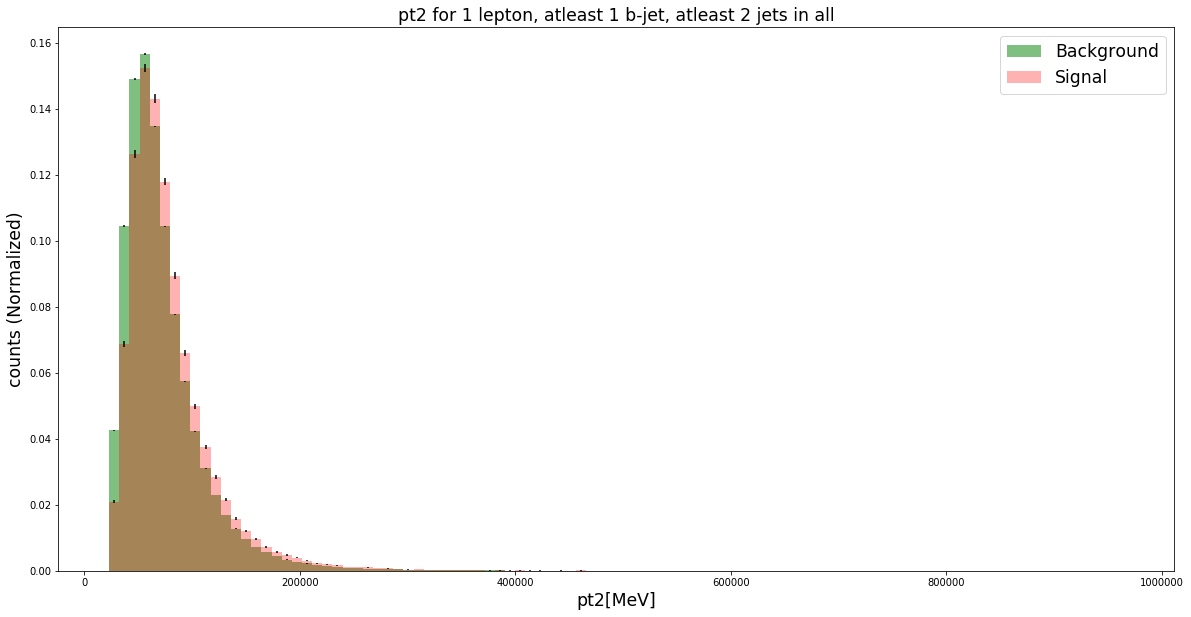

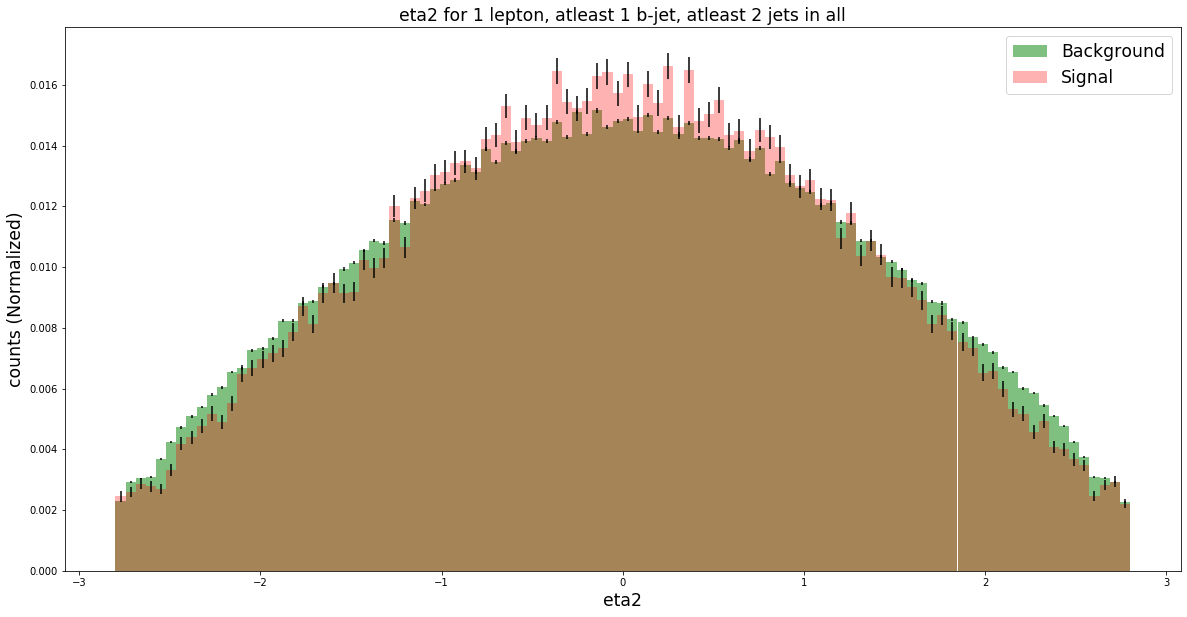

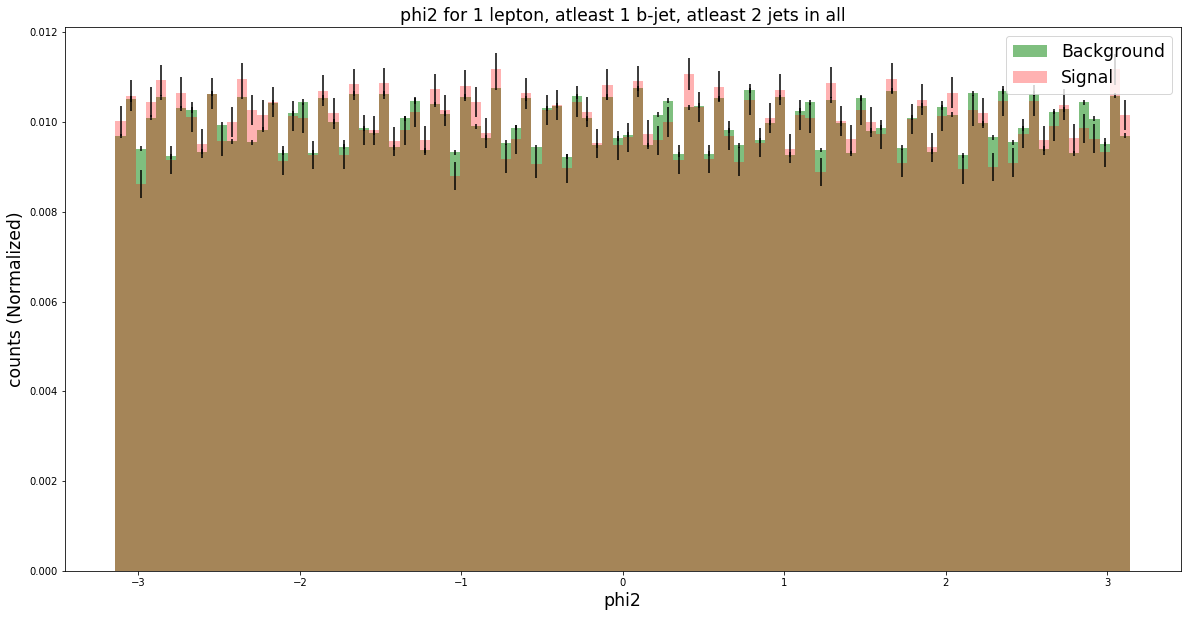

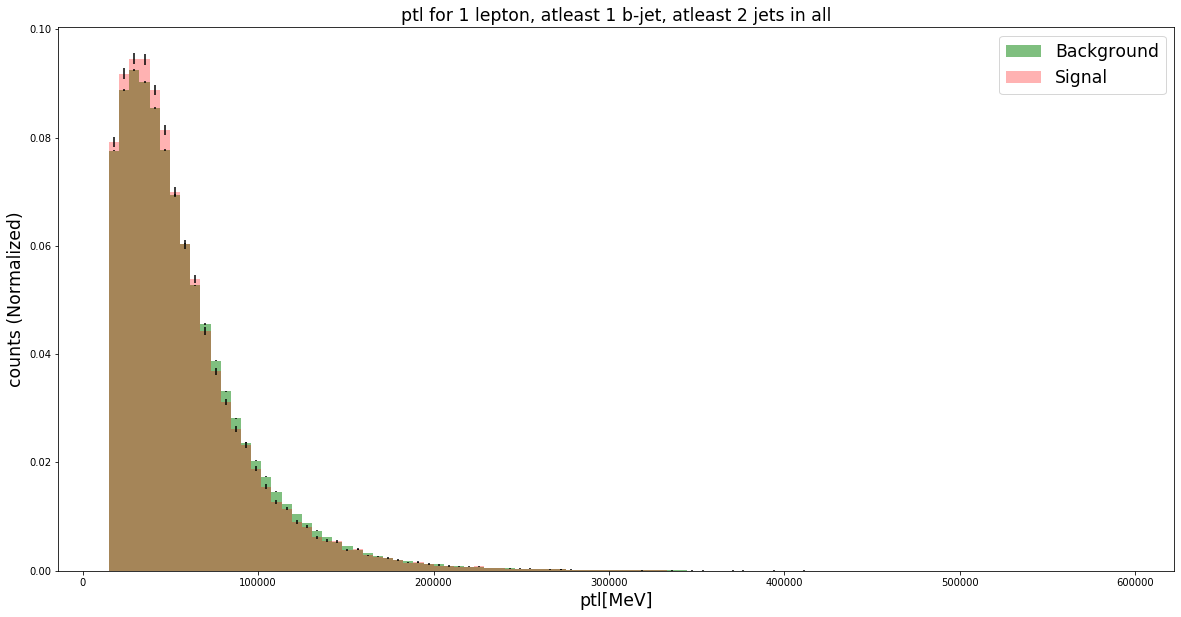

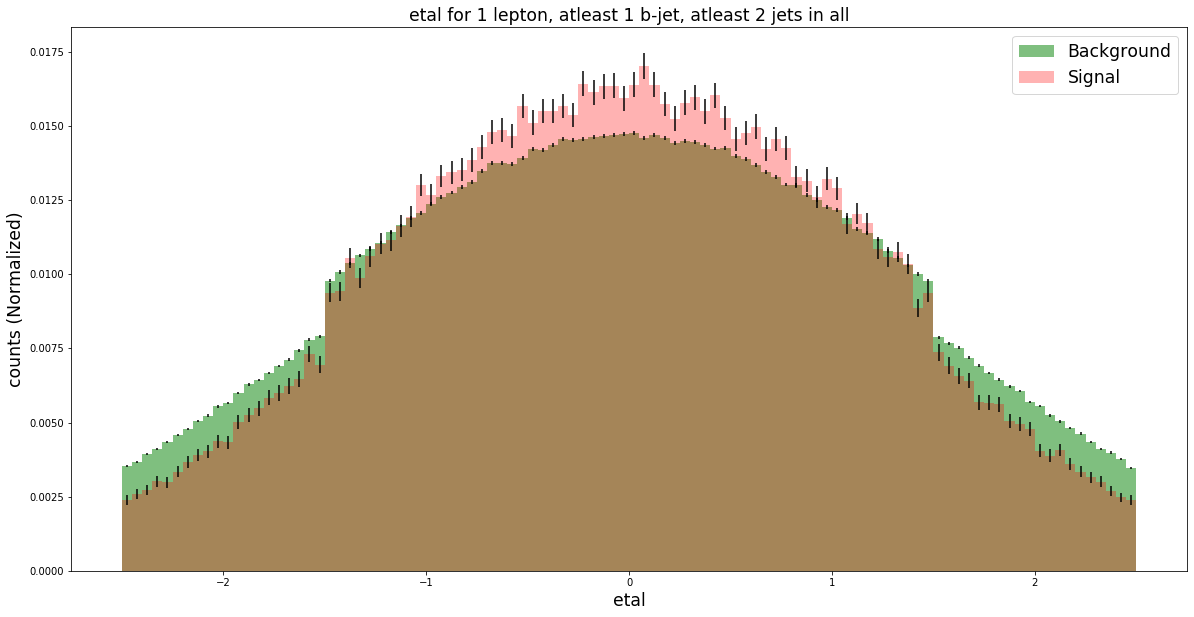

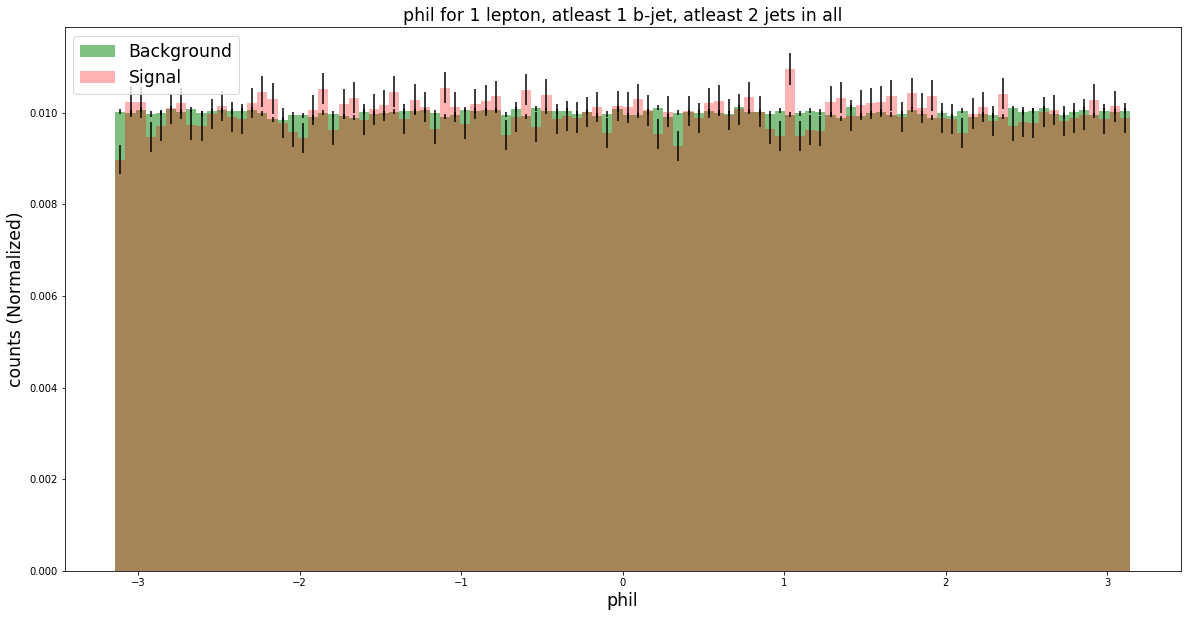

In [8]:
for i in range(np.size(sigT)):
#for i in range(1):    
    hist, bin_edges = np.histogram(sig[:,i],bins=100)
    step=bin_edges[1]-bin_edges[0]
    bins=np.linspace(bin_edges[0]+step/2,bin_edges[-1]-step/2,np.size(bin_edges)-1)
    histBG, _= np.histogram(bg[:,i],bins=bin_edges)
    err=np.sqrt(hist)
    errBG=np.sqrt(histBG)
    err=err/np.sum(hist)
    hist=hist/np.sum(hist)
    errBG=errBG/np.sum(histBG)
    histBG=histBG/np.sum(histBG)
    
    fig=plt.figure(figsize=(20,10))
    #plt.bar(binsor,histBGor,width=step,yerr=errBGor,label="Background")
    #plt.bar(binsor,histor,width=step,yerr=error,label="Signal")
    plt.bar(bins,histBG,yerr=errBG,label="Background",width=step,alpha=0.5,color="green")
    plt.bar(bins,hist,yerr=err,label="Signal",width=step,alpha=0.3,color="red")
    plt.title(sigT[i] + " for 1 lepton, atleast 1 b-jet, atleast 2 jets in all", fontsize='xx-large')
    plt.ylabel("counts (Normalized)", fontsize='xx-large')
    plt.xlabel(sigU[i], fontsize='xx-large')
    #plt.yscale("log")
    plt.legend(fontsize='xx-large')
    
    plt.show()
    
#    rel=hist/histBG
#    errrel=np.sqrt((err/histBG)**2+(errBG*hist/(histBG**2))**2)
#    
#    fig=plt.figure(figsize=(20,10))
#    plt.bar(bins,rel,width=step,yerr=errrel,label="Signal/Background")
#    plt.title(sig0T[i] + " (log) signal over background", fontsize='xx-large')
#    plt.ylabel("Signal over background", fontsize='xx-large')
#    plt.xlabel(sig0U[i], fontsize='xx-large')
#    plt.yscale("log")
#    plt.legend(fontsize='xx-large')